In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/Users/lb/Downloads/chipotle.csv")

In [3]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [4]:
#use apply(lambda) to get rid of $ and float

In [5]:
df["IP"]=df["item_price"].apply(lambda d: float(d.strip("$")))

In [6]:
df["IP_A"]=df["item_price"].str.strip("$").astype(float)

In [7]:
df

,order_id,quantity,item_name,choice_description,item_price,IP,IP_A
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,16.98
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75,8.75


In [8]:
df["IN"]=df["item_name"].apply(lambda b: b.upper())

In [9]:
#what is the revenue of chicken bowl

In [10]:
condition=df["item_name"]=="Chicken Bowl"
c_b_r=round(df[condition]["IP"].sum(),2)

In [11]:
c_b_r

7342.73

In [12]:
total_revenue=round(df["IP"].sum(),2)

In [13]:
total_revenue

34500.16

In [14]:
round(c_b_r/total_revenue*100, 2)

21.28

In [15]:
revenue=df.groupby("item_name")["IP"].sum()

In [16]:
revenue.sort_values(ascending=False, inplace=True)

In [17]:
revenue=revenue.to_frame()

In [18]:
revenue.head()

,IP
item_name,
Chicken Bowl,7342.73
Chicken Burrito,5575.82
Steak Burrito,3851.43
Steak Bowl,2260.19
Chips and Guacamole,2201.04


In [19]:
revenue["%from_revenue"]=revenue["IP"].apply(lambda r: r/total_revenue)

In [20]:
revenue5=revenue["IP"].iloc[:5]

In [21]:
revenue5

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Steak Burrito          3851.43
Steak Bowl             2260.19
Chips and Guacamole    2201.04
Name: IP, dtype: float64

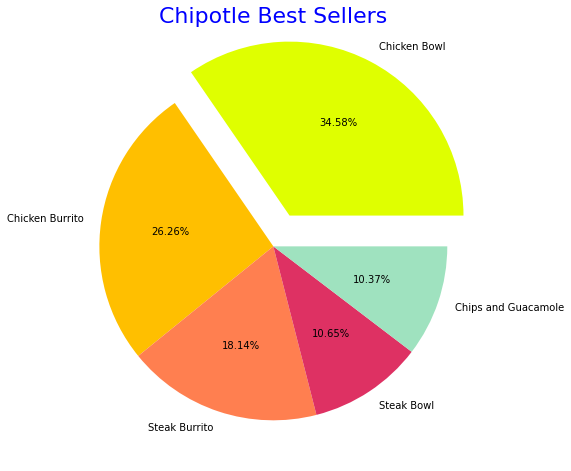

In [24]:
plt.figure(figsize=(12,8))
x=revenue5.values
l=revenue5.index
c=["#DFFF00","#FFBF00","#FF7F50","#DE3163","#9FE2BF"]
e=[0.2, 0,0, 0,0]
plt.title("Chipotle Best Sellers", color="blue", fontsize=22);
plt.pie(x, labels=l, explode=e, colors=c, autopct="%.2f%%");